In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6409 - acc: 0.6154 - val_loss: 0.5197 - val_acc: 0.7528
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4168 - acc: 0.8216 - val_loss: 1.1688 - val_acc: 0.5528
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3144 - acc: 0.8736 - val_loss: 0.3865 - val_acc: 0.8336
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2408 - acc: 0.9061 - val_loss: 0.3609 - val_acc: 0.8542
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1812 - acc: 0.9324 - val_loss: 0.3842 - val_acc: 0.8390
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1236 - acc: 0.9579 - val_loss: 0.4081 - val_acc: 0.8514
Epoch 7/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.0944 - acc: 0.9673 - val_loss: 0.6154 - val_acc:

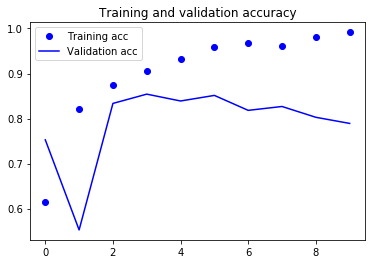

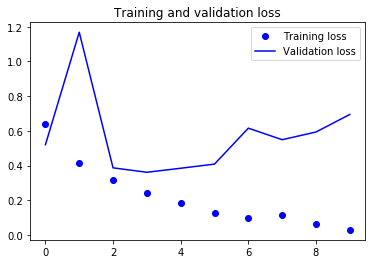

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
test_loss, test_score = model.evaluate(input_test, y_test, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

25000/25000 [==============================] - 28s 1ms/step
Loss on test set:  0.675347436123
Accuracy on test set:  0.79124


In [7]:
import numpy as np
preds = model.predict(input_test, batch_size=16)

In [13]:
preds=preds.flatten()
for i in range(len(preds)):
    preds[i]=round(preds[i])
print(preds.shape)
print(preds)
print(y_test.shape)
print(y_test)

(25000,)
[ 0.  1.  0. ...,  0.  0.  1.]
(25000,)
[0 1 1 ..., 0 0 0]


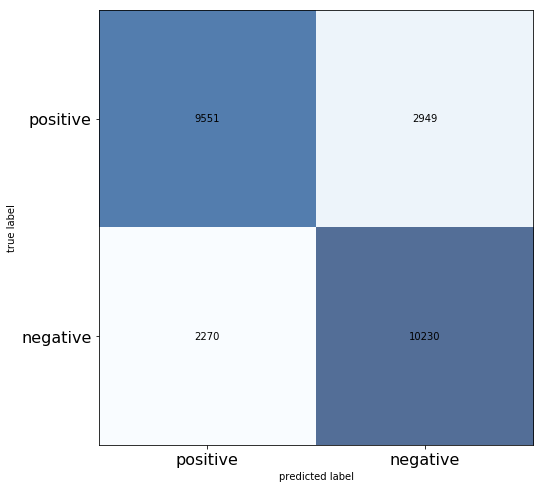

In [14]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(y_test, preds)
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, alpha=0.7,cmap=plt.cm.Blues)
plt.xticks(range(2), ['positive', 'negative'], fontsize=16)
plt.yticks(range(2), ['positive', 'negative'], fontsize=16)
plt.show()

In [18]:
import json
import keras
from pprint import pprint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

json_file = open('Team5_Microsoft_012.json')
json_str = json_file.read()
data = json.loads(json_str)

texts = list(data['text'].values())
labels = list(data['sentiment'].values())
labels = keras.utils.to_categorical(labels, 3)

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
label = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', label.shape)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

Found 1689 unique tokens.
Shape of data tensor: (178, 100)
Shape of label tensor: (178, 3)


In [25]:
preds = model.predict(X_test, batch_size=16)
preds = preds.flatten()
for i in range(len(preds)):
    preds[i]=round(preds[i])
original_label = np.argmax(y_test, axis=-1) 
print(preds.shape)
print(preds)
print(original_label.shape)
print(original_label)

(36,)
[ 1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.]
(36,)
[1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 1]


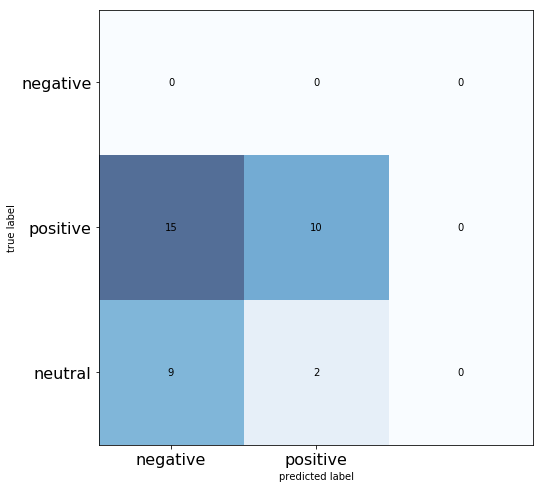

In [27]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(original_label, preds)
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, alpha=0.7,cmap=plt.cm.Blues)
plt.xticks(range(2), [ 'negative','positive'], fontsize=16)
plt.yticks(range(3), [ 'negative','positive','neutral'], fontsize=16)
plt.show()